In [20]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
# read flash.dat to a list of lists
# datContent = [i.strip().split() for i in open("./densZ0002680.dat").readlines()]
# df = pd.read_csv("./data/densX0000220.dat", sep=" ",  names=["X","Y","Z","dens"])
# data = np.array([df.X.values, df.Y.values, df.Z.values, df.dens.values])
df = pd.read_csv("./data/psi_ini.dat", sep=" ",  names=["X","Y","Z","dens"])
data = np.array([df.X.values, df.Y.values, df.Z.values, df.dens.values])
Nx = 80
Ny = 80
Nz = 80
xr = max(data[0])
xl = min(data[0])
yr = max(data[1])
yl = min(data[1])
zr = max(data[2])
zl = min(data[2])
dx = (xr-xl)/Nx
dy = (yr-yl)/Ny
dz = (zr-zl)/Nz

In [21]:
print((Nx+1)**3)
df

531441


,X,Y,Z,dens
0,-5.0,-5.0,-5.000,0.000000e+00
1,-5.0,-5.0,-4.875,1.748498e-320
2,-5.0,-5.0,-4.750,2.937490e-315
3,-5.0,-5.0,-4.625,3.608820e-310
4,-5.0,-5.0,-4.500,3.243670e-305
...,...,...,...,...
531436,5.0,5.0,4.500,3.243670e-305
531437,5.0,5.0,4.625,3.608820e-310
531438,5.0,5.0,4.750,2.937490e-315
531439,5.0,5.0,4.875,1.748498e-320


In [22]:
def ijk(i, j, k, Nx, Ny, Nz):
    return [(((i) * (Ny + 1)) + (j)) * (Nz + 1) + (k)]

def gene_data(f, xl, Nx, dx, yl, Ny, dy, zl, Nz, dz):
    data_gen = np.zeros((Nx+1)*(Ny+1)*(Nz+1))
    for i in range(Nx+1):
        for j in range(Ny+1):
            for k in range(Nz+1):
                data_gen[ijk(i, j, k, Nx, Ny, Nz)] = f(xl+i*dx, yl+j*dy, zl+k*dz)
    return data_gen

In [23]:
print([xl,dx,Nx,yl,dy,Ny,zl,dz,Nz])

[-5.0, 0.125, 80, -5.0, 0.125, 80, -5.0, 0.125, 80]


In [24]:
def get_normsimp(dd, xl, Nx, dx, yl, Ny, dy, zl, Nz, dz):
    normz = np.zeros((Nx+1, Ny+1))
    normy = np.zeros((Nx+1))
    norm = 0
    for i in range(Nx+1):
        for j in range(Ny+1):
            normz[i,j] = dd[(((i) * (Ny + 1)) + (j)) * (Nz + 1)+0] \
            + 2*sum(dd[(((i) * (Ny + 1)) + (j)) * (Nz + 1):(((i) * (Ny + 1)) + (j)) * (Nz + 1)+Nz-2:2]) \
            + 4*sum(dd[(((i) * (Ny + 1)) + (j)) * (Nz + 1)+1:(((i) * (Ny + 1)) + (j)) * (Nz + 1)+Nz-1:2]) \
            + dd[(((i) * (Ny + 1)) + (j)) * (Nz + 1)+ Nz-1]

    for i in range(Nx+1):
        normy[i] = normz[i, 0] \
        + 2*sum(normz[i, :Ny-2:2]) \
        + 4*sum(normz[i, 1:Ny-1:2]) \
        + normz[i, Ny-1]

    norm = normy[0] \
    + 2*sum(normy[:Nx-2:2]) \
    + 4*sum(normy[1:Nx-1:2]) \
    + normy[Nx-1]

    return norm*dx*dy*dz/27

## test get_normsimp

In [26]:
omg = 20
pi = 4 * np.arctan(1)
f1 = lambda x, y, z: pow(np.exp(-omg*(x**2+y**2+z**2)/2)*pow(omg/pi,3/4),2)
f2 = lambda x, y, z: np.exp(-(x ** 2 + y ** 2 + z ** 2))

test_ana1 = gene_data(f1, xl, Nx, dx, yl, Ny, dy, zl, Nz, dz)
test_ana2 = gene_data(f2, xl, Nx, dx, yl, Ny, dy, zl, Nz, dz)

In [27]:
get_normsimp(test_ana1, xl, Nx, dx, yl, Ny, dy, zl, Nz, dz)

0.9992554902294407

In [8]:
integrate.tplquad(f1, xl, xr, yl, yr, zl, zr)

(1.0000000000000013, 1.4749921708438215e-08)

In [9]:
get_normsimp(test_ana2, xl, Nx, dx, yl, Ny, dy, zl, Nz, dz)

5.568327996630138

In [10]:
integrate.tplquad(f2, xl, xr, yl, yr, zl, zr)

(5.568327996806024, 1.4650679248701554e-08)

## Test initial wave function and trap

[0.9992554902294407, 0.7057237997926548, 1]
(81, 4)


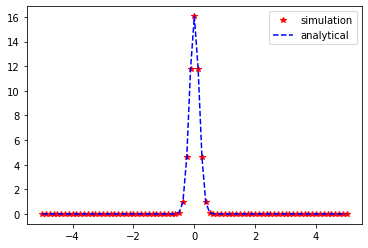

In [28]:
N = 1
pi = 4 * np.arctan(1)
omg = 20
norm = np.sqrt(N)*pow(omg/pi,3/4)
anaFunc = lambda x, y, z: np.exp(-omg*(x**2+y**2+z**2)/2)*norm

data_anal = gene_data(anaFunc, xl, Nx, dx, yl, Ny, dy, zl, Nz, dz)
print([get_normsimp(data_anal**2, xl, Nx, dx, yl, Ny, dy, zl, Nz, dz), get_normsimp(df.dens, xl, Nx, dx, yl, Ny, dy, zl, Nz, dz), N])

dfz = df[(df.X == 0)&(df.Y == 0)]
print(dfz.shape)
z= np.linspace(zl, zr, Nz+1)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(z, dfz.dens**2, 'r*', label="simulation")
# ax2 = fig.add_subplot(212)
ax1.plot(z, anaFunc(0,0,z)**2, 'b--', label="analytical")
plt.legend()

(531441, 4)


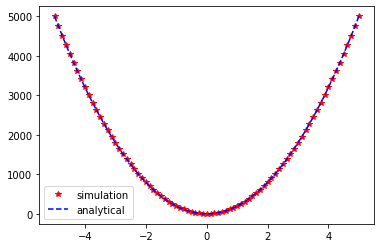

In [29]:
N = 1
pi = 4 * np.arctan(1)
omg = 20
norm = np.sqrt(N)*pow(omg/pi,3/4)
Vtr = lambda x, y, z: 0.5*omg**2*(x**2+y**2+z**2)

dfV = pd.read_csv("./data/phi_ini.dat", sep=" ",  names=["X","Y","Z","phi"])
dfVz = dfV[(dfV.X == 0)&(dfV.Y == 0)]
print(dfV.shape)
z= np.linspace(zl, zr, Nz+1)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(z, dfVz.phi, 'r*', label="simulation")
# ax2 = fig.add_subplot(212)
ax1.plot(z, Vtr(0,0,z), 'b--', label="analytical")
plt.legend()

## Test ground state wave function

In [35]:
dfd = pd.read_csv("./data/densX0000240.dat", sep=" ",  names=["X","Y","Z","dens"])
datad = np.array([df.X.values, df.Y.values, df.Z.values, df.dens.values])
Nxd = 40
Nyd = 40
Nzd = 40
xrd = max(datad[0])
xld = min(datad[0])
yrd = max(datad[1])
yld = min(datad[1])
zrd = max(datad[2])
zld = min(datad[2])
dxd = (xrd-xld)/Nxd
dyd = (yrd-yld)/Nyd
dzd = (zrd-zld)/Nzd

In [36]:
print((Nxd+1)**3)
print([xld,dxd,Nxd,yld,dyd,Nyd,zld,dzd,Nzd])
dfd

68921
[-5.0, 0.25, 40, -5.0, 0.25, 40, -5.0, 0.25, 40]


,X,Y,Z,dens
0,-5.0,-5.0,-5.00,0.0
1,-5.0,-5.0,-4.75,0.0
2,-5.0,-5.0,-4.50,0.0
3,-5.0,-5.0,-4.25,0.0
4,-5.0,-5.0,-4.00,0.0
...,...,...,...,...
68916,5.0,5.0,4.00,0.0
68917,5.0,5.0,4.25,0.0
68918,5.0,5.0,4.50,0.0
68919,5.0,5.0,4.75,0.0


In [37]:
0.1443/3*2

0.09620000000000001

In [38]:
0.0962*3/2

0.14429999999999998

(41, 4)


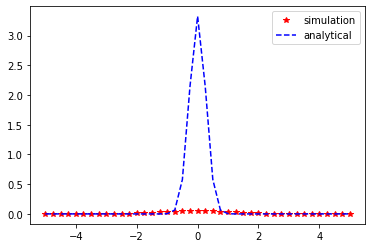

In [42]:
N = 1
pi = 4 * np.arctan(1)
omg = 7
norm = np.sqrt(N)*pow(omg/pi,3/4)
anaFunc = lambda x, y, z: np.exp(-omg*(x**2+y**2+z**2)/2)*norm

data_anal = gene_data(anaFunc, xld, Nxd, dxd, yld, Nyd, dyd, zld, Nzd, dzd)
# print([get_normsimp(data_anal**2, xld, Nxd, dxd, yld, Nyd, dyd, zld, Nzd, dzd), get_normsimp(dfd.dens, xld, Nxd, dxd, yld, Nyd, dyd, zld, Nzd, dzd), N])

dfzd = dfd[(dfd.X == 0)&(dfd.Y == 0)]
print(dfzd.shape)
zd= np.linspace(zld, zrd, Nzd+1)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(zd, dfzd.dens, 'r*', label="simulation")
# ax2 = fig.add_subplot(212)
ax1.plot(zd, anaFunc(0,0,zd)**2, 'b--', label="analytical")
plt.legend()

In [18]:
get_normsimp(dfd.dens, xld, Nxd, dxd, yld, Nyd, dyd, zld, Nzd, dzd)

0.9996924980112492

In [19]:
3/2*omg

0.1905